In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# SSL 에러 해결
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# 글꼴 지정
plt.rcParams['font.family'] = ['AppleGothic']

# page 372
df = pd.read_csv('../file_processing/KOBIS_역대_박스오피스.csv')
df

,순위,영화명,개봉일,매출액,관객수,스크린수,대표국적,국적,배급사
0,1,명량,41850,1.357621e+11,17616299,1587,188729,한국,(주)씨제이이엔엠
1,2,극한직업,43488,1.396571e+11,16266480,2003,292817,한국,(주)씨제이이엔엠
2,3,신과함께-죄와 벌,43089,1.157275e+11,14414658,1912,214631,한국,롯데쇼핑㈜롯데엔터테인먼트
3,4,국제시장,41990,1.109557e+11,14265780,1044,212721,한국,(주)씨제이이엔엠
4,5,어벤져스: 엔드게임,43579,1.224922e+11,13977602,2835,246433,미국,월트디즈니컴퍼니코리아 유한책임회사
...,...,...,...,...,...,...,...,...,...
506,505,미쓰 와이프,42229,7.387087e+09,988451,437,한국,한국,플러스엠 엔터테인먼트
507,506,시체가 돌아왔다,40997,7.360631e+09,986923,435,한국,한국,(주)씨제이이엔엠
508,507,원더풀 라디오,40913,7.255598e+09,986287,474,한국,한국,(주)쇼박스
509,508,전국노래자랑,41395,6.685476e+09,977873,581,한국,한국,롯데쇼핑㈜롯데엔터테인먼트


In [64]:
# 결측치 확인하기
df.isnull().sum()

순위       0
영화명      0
개봉일      0
매출액     11
관객수      0
스크린수     0
대표국적     0
국적       0
배급사      7
dtype: int64

In [65]:
# 중복데이터 확인하기
df[df.duplicated(keep=False)]

,순위,영화명,개봉일,매출액,관객수,스크린수,대표국적,국적,배급사
28,29,기생충,43615,8.745983e+10,10313086,1948,한국,한국,(주)씨제이이엔엠
29,29,기생충,43615,8.745983e+10,10313086,1948,한국,한국,(주)씨제이이엔엠
186,186,친구,36981,0.000000e+00,2678846,0,한국,한국,NaN
187,186,친구,36981,0.000000e+00,2678846,0,한국,한국,NaN


In [66]:
df.duplicated().sum()

np.int64(2)

In [67]:
df.describe()

,순위,개봉일,매출액,관객수,스크린수
count,511.000000,511.000000,5.000000e+02,5.110000e+02,511.000000
mean,254.422701,40962.479452,2.082051e+10,3.240215e+06,669.741683
std,147.162553,2118.519354,2.680035e+10,2.945119e+06,585.545922
min,1.000000,34069.000000,0.000000e+00,9.774010e+05,0.000000
25%,127.500000,39110.500000,0.000000e+00,1.421408e+06,88.000000
50%,254.000000,41046.000000,1.255538e+10,2.108273e+06,580.000000
75%,381.500000,42764.000000,2.555328e+10,3.664510e+06,1005.000000
max,509.000000,45406.000000,1.396571e+11,1.761630e+07,2980.000000


In [68]:
# 열 '매출액'과 '배급사'의 Null값 비중은 얼마나 차지하는지 확인
null_rate1 = df['매출액'].isnull().sum() / df['매출액'].shape[0] * 100
null_rate2 = df['배급사'].isnull().sum() / df['배급사'].shape[0] * 100
print("매출액 Null 값 차지 비율 = {:.2f}%".format(null_rate1))
print("배급사 Null 값 차지 비율 = {:.2f}%".format(null_rate2))

매출액 Null 값 차지 비율 = 2.15%
배급사 Null 값 차지 비율 = 1.37%


In [69]:
# 중복 데이터 삭제
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

np.int64(0)

In [70]:
# 대표국적 삭제
df_backup = df.copy()
# df.drop(['대표국적'], axis=1, inplace=True)
del df['대표국적']
df

,순위,영화명,개봉일,매출액,관객수,스크린수,국적,배급사
0,1,명량,41850,1.357621e+11,17616299,1587,한국,(주)씨제이이엔엠
1,2,극한직업,43488,1.396571e+11,16266480,2003,한국,(주)씨제이이엔엠
2,3,신과함께-죄와 벌,43089,1.157275e+11,14414658,1912,한국,롯데쇼핑㈜롯데엔터테인먼트
3,4,국제시장,41990,1.109557e+11,14265780,1044,한국,(주)씨제이이엔엠
4,5,어벤져스: 엔드게임,43579,1.224922e+11,13977602,2835,미국,월트디즈니컴퍼니코리아 유한책임회사
...,...,...,...,...,...,...,...,...
506,505,미쓰 와이프,42229,7.387087e+09,988451,437,한국,플러스엠 엔터테인먼트
507,506,시체가 돌아왔다,40997,7.360631e+09,986923,435,한국,(주)씨제이이엔엠
508,507,원더풀 라디오,40913,7.255598e+09,986287,474,한국,(주)쇼박스
509,508,전국노래자랑,41395,6.685476e+09,977873,581,한국,롯데쇼핑㈜롯데엔터테인먼트


In [71]:
# 순위 삭제
del df['순위']
df

,영화명,개봉일,매출액,관객수,스크린수,국적,배급사
0,명량,41850,1.357621e+11,17616299,1587,한국,(주)씨제이이엔엠
1,극한직업,43488,1.396571e+11,16266480,2003,한국,(주)씨제이이엔엠
2,신과함께-죄와 벌,43089,1.157275e+11,14414658,1912,한국,롯데쇼핑㈜롯데엔터테인먼트
3,국제시장,41990,1.109557e+11,14265780,1044,한국,(주)씨제이이엔엠
4,어벤져스: 엔드게임,43579,1.224922e+11,13977602,2835,미국,월트디즈니컴퍼니코리아 유한책임회사
...,...,...,...,...,...,...,...
506,미쓰 와이프,42229,7.387087e+09,988451,437,한국,플러스엠 엔터테인먼트
507,시체가 돌아왔다,40997,7.360631e+09,986923,435,한국,(주)씨제이이엔엠
508,원더풀 라디오,40913,7.255598e+09,986287,474,한국,(주)쇼박스
509,전국노래자랑,41395,6.685476e+09,977873,581,한국,롯데쇼핑㈜롯데엔터테인먼트


In [72]:
# 배급사 결측치 제거
df.dropna(subset=['배급사'], how='any', inplace=True)
df.isnull().sum()

영화명      0
개봉일      0
매출액     11
관객수      0
스크린수     0
국적       0
배급사      0
dtype: int64

In [73]:
# 매출액 결측치 0으로 대체
# df['매출액'].fillna(0, inplace=True)
df.fillna({'매출액': 0}, inplace=True)
df.isnull().sum()

영화명     0
개봉일     0
매출액     0
관객수     0
스크린수    0
국적      0
배급사     0
dtype: int64

In [74]:
# 배급사 그룹화해서 저장
distributor = df.groupby(['배급사']).sum()
distributor

,영화명,개봉일,매출액,관객수,스크린수,국적
배급사,,,,,,
(유)씨에이치엔터테인먼트,원스어폰어타임,39478,1.018014e+10,1562486,315,한국
(주)넥스트엔터테인먼트월드(NEW),7번방의 선물부산행변호인변호인연평해전숨바꼭질감시자들안시성더 킹독전바람과 함께 사라지...,2242668,1.380285e+12,177380645,48967,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...
"(주)넥스트엔터테인먼트월드(NEW),(주)에스비에스콘텐츠허브",해결사,40430,1.406391e+10,1873327,524,한국
"(주)메리크리스마스,TCO(주)더콘텐츠온",내안의 그놈,43474,1.641212e+10,1916855,1041,한국
(주)쇼박스,도둑들암살택시운전사파묘괴물검사외전관상국가대표디워웰컴 투 동막골터널내부자들럭키은밀하게...,3906172,1.947712e+12,338836979,59872,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...
...,...,...,...,...,...,...
플러스엠 엔터테인먼트,서울의 봄헌트너의 결혼식박열명당제보자도어락리틀 포레스트부라더오케이 마담동주미씽: 사...,605070,3.271800e+11,36665990,14443,한국한국한국한국한국한국한국한국한국한국한국한국한국한국
"플러스엠 엔터테인먼트,(주)콘텐츠지오",롱 리브 더 킹: 목포 영웅,43635,9.228799e+09,1094404,965,한국
"플러스엠 엔터테인먼트,(주)키위미디어그룹",범죄도시,43011,5.631801e+10,6879841,1315,한국


In [75]:
# 스크린수를 기준으로 상위 배급사 5개 추출
distributor.sort_values(by='스크린수', ascending=False).head(5)

,영화명,개봉일,매출액,관객수,스크린수,국적
배급사,,,,,,
(주)씨제이이엔엠,"명량극한직업국제시장베테랑광해, 왕이 된 남자기생충엑시트설국열차수상한 그녀공조히말라야...",3598319,2.652520e+12,336777807,82487,"한국한국한국한국한국한국한국한국,체코한국한국한국한국한국한국,독일한국한국한국한국한국한국..."
(주)쇼박스,도둑들암살택시운전사파묘괴물검사외전관상국가대표디워웰컴 투 동막골터널내부자들럭키은밀하게...,3906172,1.947712e+12,338836979,59872,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...
(주)넥스트엔터테인먼트월드(NEW),7번방의 선물부산행변호인변호인연평해전숨바꼭질감시자들안시성더 킹독전바람과 함께 사라지...,2242668,1.380285e+12,177380645,48967,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...
롯데쇼핑㈜롯데엔터테인먼트,신과함께-죄와 벌해적: 바다로 간 산적과속스캔들최종병기 활청년경찰덕혜옹주더 테러 라...,1959184,9.179272e+11,135386201,26565,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...
롯데컬처웍스(주)롯데엔터테인먼트,신과함께-인과 연한산: 용의 출현완벽한 타인82년생 김지영모가디슈말모이증인히트맨타짜...,746822,4.771150e+11,54710684,26070,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국


In [76]:
# 전체 스크린수가 30,000개 이상인 배급사 추출
screen = distributor[distributor['스크린수'] >= 30000]
screen

,영화명,개봉일,매출액,관객수,스크린수,국적
배급사,,,,,,
(주)넥스트엔터테인먼트월드(NEW),7번방의 선물부산행변호인변호인연평해전숨바꼭질감시자들안시성더 킹독전바람과 함께 사라지...,2242668,1.380285e+12,177380645,48967,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...
(주)쇼박스,도둑들암살택시운전사파묘괴물검사외전관상국가대표디워웰컴 투 동막골터널내부자들럭키은밀하게...,3906172,1.947712e+12,338836979,59872,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...
(주)씨제이이엔엠,"명량극한직업국제시장베테랑광해, 왕이 된 남자기생충엑시트설국열차수상한 그녀공조히말라야...",3598319,2.652520e+12,336777807,82487,"한국한국한국한국한국한국한국한국,체코한국한국한국한국한국한국,독일한국한국한국한국한국한국..."


In [79]:
# 영화 배급사 중 역대 흥행 관객수 조회
boxoffice_rank = distributor.sort_values(by='관객수', ascending=False)
boxoffice_rank.head(5)

,영화명,개봉일,매출액,관객수,스크린수,국적
배급사,,,,,,
(주)쇼박스,도둑들암살택시운전사파묘괴물검사외전관상국가대표디워웰컴 투 동막골터널내부자들럭키은밀하게...,3906172,1.947712e+12,338836979,59872,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...
(주)씨제이이엔엠,"명량극한직업국제시장베테랑광해, 왕이 된 남자기생충엑시트설국열차수상한 그녀공조히말라야...",3598319,2.652520e+12,336777807,82487,"한국한국한국한국한국한국한국한국,체코한국한국한국한국한국한국,독일한국한국한국한국한국한국..."
CJ ENM,"해운대화려한 휴가타짜좋은 놈, 나쁜 놈, 이상한 놈아저씨전우치투사부일체살인의 추억동...",2581858,5.237937e+11,185715341,15190,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...
(주)넥스트엔터테인먼트월드(NEW),7번방의 선물부산행변호인변호인연평해전숨바꼭질감시자들안시성더 킹독전바람과 함께 사라지...,2242668,1.380285e+12,177380645,48967,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...
롯데쇼핑㈜롯데엔터테인먼트,신과함께-죄와 벌해적: 바다로 간 산적과속스캔들최종병기 활청년경찰덕혜옹주더 테러 라...,1959184,9.179272e+11,135386201,26565,한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국한국...


In [81]:
# 구간별 나누기, 10개의 구간으로 나눈다
df['스크린수_cut'] = pd.cut(df['스크린수'], bins=10)
df['스크린수_cut'].value_counts()

스크린수_cut
(-2.98, 298.0]      154
(298.0, 596.0]      103
(596.0, 894.0]       93
(894.0, 1192.0]      72
(1192.0, 1490.0]     38
(1490.0, 1788.0]     18
(1788.0, 2086.0]     11
(2384.0, 2682.0]      7
(2086.0, 2384.0]      4
(2682.0, 2980.0]      3
Name: count, dtype: int64

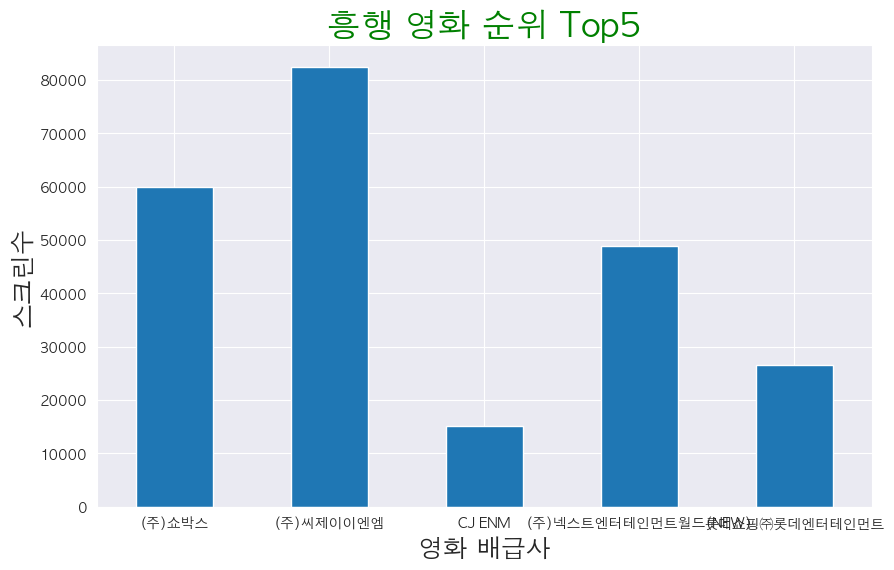

In [82]:
# 영화 흥행 상위 5개 배급사 데이터를 기반으로 barplot 그래프로 작성
# 조건
# 그래프 종류 : barplot(막대그래프)
# x축 label 제목 : 영화 배급사, 글자크기 18
# y축 label 제목 : 스크린수, 글자크기 18
# 그래프 제목 : 흥행 영화 순위 Top5, 글자색 녹색, 글자크기 24
plt.figure(figsize=(10, 6))
boxoffice_rank.head(5).스크린수[:].plot(kind='bar', rot=0)
plt.title('흥행 영화 순위 Top5', fontsize=24, color='green')
plt.xlabel('영화 배급사', fontsize=18)
plt.ylabel('스크린수', fontsize=18)
plt.show()

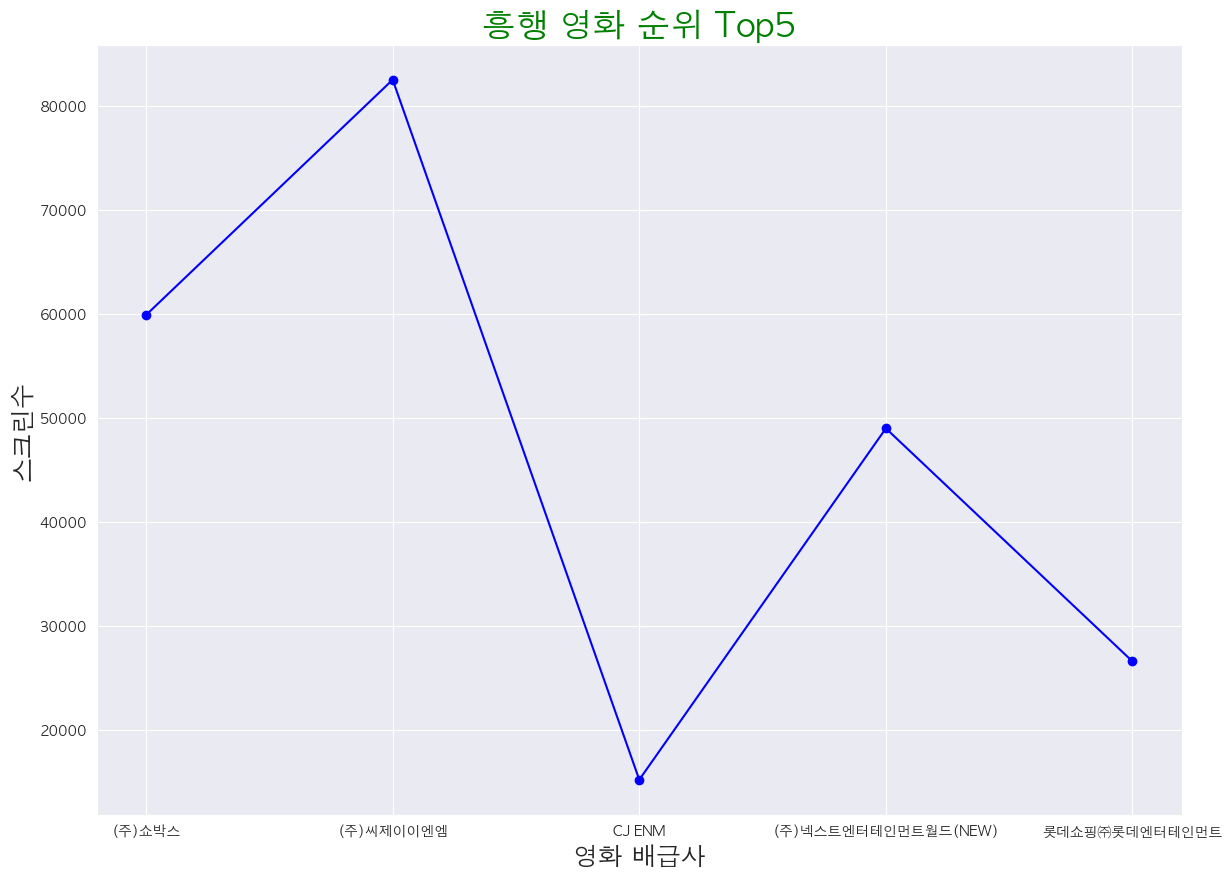

In [86]:
# 영화 흥행 상위 5개 배급사 데이터를 기반으로 plot 꺾은선 그래프로 작성
# 조건
# 그래프 종류 : plot(꺾은선 그래프)
# 그래프 크기 : 가로 너비 14, 세로 길이 10
# x축 label 제목 : 영화 배급사, 글자크기 18
# y축 label 제목 : 스크린수, 글자크기 18
# 선 스타일 : --
# 마커표시 : 'o'
# 그래프 제목 : 흥행 영화 순위 Top5, 글자색 녹색, 글자크기 24
plt.figure(figsize=(14, 10))
plt.plot(boxoffice_rank.head(5).스크린수[:], linestyle='--', marker='o', color='blue')
plt.title('흥행 영화 순위 Top5', fontsize=24, color='green')
plt.xlabel('영화 배급사', fontsize=18)
plt.ylabel('스크린수', fontsize=18)
plt.show()

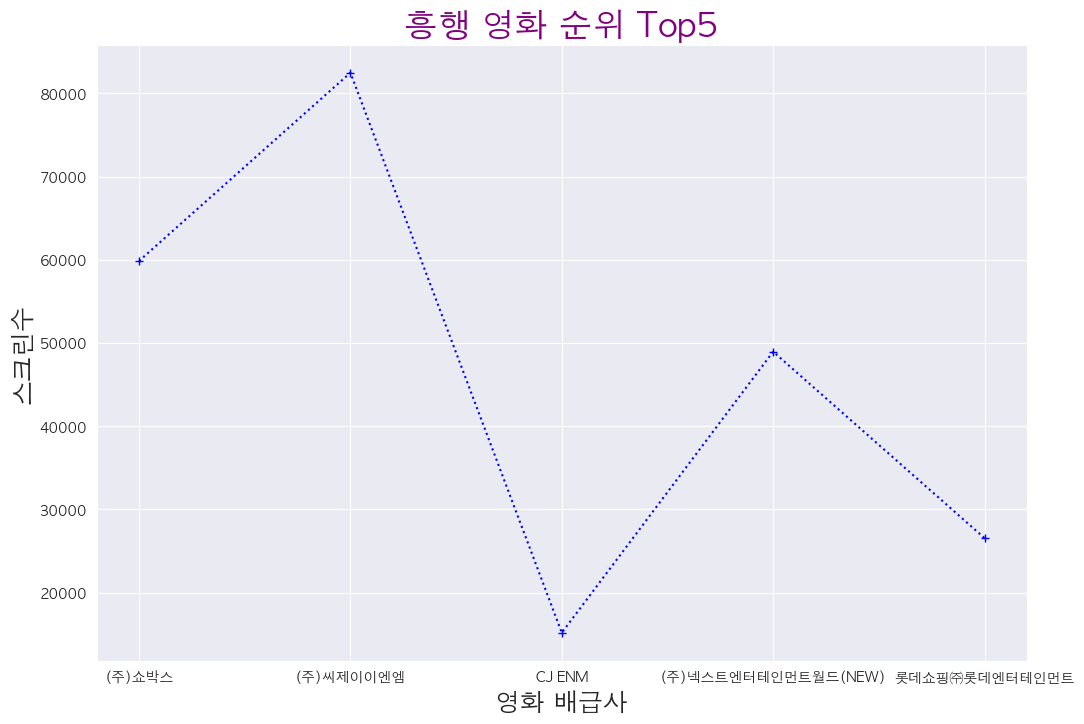

In [92]:
# 영화 흥행 상위 5개 배급사 데이터를 기반으로 plot 꺾은선 그래프로 작성
# 조건
# 그래프 종류 : plot(꺾은선 그래프)
# 그래프 크기 : 가로 너비 12, 세로 길이 8
# x축 label 제목 : 영화 배급사, 글자크기 18
# y축 label 제목 : 스크린수, 글자크기 18
# 선 스타일 : :
# 마커표시 : '+'
# 그래프 제목 : 흥행 영화 순위 Top5, 글자색 보라, 글자크기 24
plt.figure(figsize=(12, 8))
plt.plot(boxoffice_rank.head(5)['스크린수'], linestyle=':', marker='+', color='blue')
plt.title('흥행 영화 순위 Top5', fontsize=24, color='purple')
plt.xlabel('영화 배급사', fontsize=18)
plt.ylabel('스크린수', fontsize=18)
plt.savefig('boxoffice_rank.png')